In [118]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import knoxdata

# Scrape Data

Please dont execute these and create unnecissary load on knoxville's servers. The data is already available. The next section will download the latest data.

In [ ]:
# knoxdata.get_write_trees_data()

# Parcels Dataset

Yeah for some reason this data was also included in the database. Keep in mind this is quite large about `100Mb`.

In [136]:
print('Loading dataset takes awhile if downloading over internet it is around 100Mb')

# parcels_df = pd.read_csv('../data/trees/parcels.csv', index_col=0)
parcels_df = pd.read_csv('https://gitlab.com/costrouc/knoxville-opendata-notebooks/raw/master/data/trees/parcels.csv', index_col=0)

/home/costrouc/.virtualenvs/knoxville-opendata-notebooks-sz4kofoF/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,5,6,9,10,16,31,37,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
parcels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152899 entries, 094MB036 to 087  01502
Data columns (total 74 columns):
APPRAISED_BLDG             152265 non-null object
APPRAISED_LAND             152262 non-null float64
APPRAISED_TOTAL            152264 non-null float64
ASSESSED_TOTAL             146903 non-null float64
BASE_PARCELID              8183 non-null object
BASE_PARCELID_1            7971 non-null object
CALCULATED_AREA            143969 non-null float64
CLTMAP                     152896 non-null float64
CONDO_LETTER               8010 non-null object
DATE_PURCHASED             3 non-null object
DEED_BOOK                  131784 non-null object
DEED_PAGE                  130274 non-null object
FULL_ADDRESS               152899 non-null object
FULL_MAIL_ADDRESS          152837 non-null object
FULL_MAIL_ADDRESS_EXTRA    1511 non-null object
HIGH_BLOCK                 555 non-null object
HIGH_LOT                   6358 non-null object
LANDUSE                    152893 non-null obj

In [138]:
# most common owners
parcels_df.OWNER.value_counts()[:25]

CITY OF KNOXVILLE                               768
KNOX COUNTY                                     335
PRIMOS LAND COMPANY LLC                         262
KNOXVILLE UTILITIES BOARD                       224
DAVID G BROWN TRUST                             159
KNOXVILLE INVESTMENT PARTNERS LLC               119
STATE OF TENNESSEE                               98
KNOXVILLES COMMUNITY DEVELOPMENT CORPORATION     83
BEP TERRA VISTA LLC                              73
WOODY CREEK LLC                                  68
HODGE FRANK E & LINDA J                          68
MONDAY ROBERT W                                  66
SMITHBILT LLC                                    65
FORT SANDERS REGIONAL MEDICAL CENTER             62
CANNON AND KUIPERS LLC                           61
FINNERTY KIRK                                    59
PHW PROPERTIES LLC                               58
AMH 2015-1 BORROWER LLC                          58
CJ RIVER HOLDINGS LLC                            57
GREENE WILDA

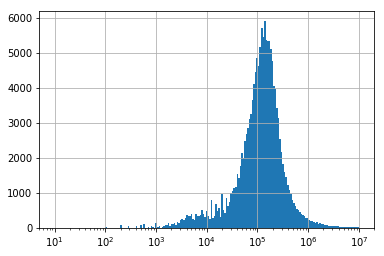

In [139]:
# log plot of appraised total
bins = 10**(np.linspace(1, 7, 200))
ax= parcels_df.APPRAISED_TOTAL[parcels_df.APPRAISED_TOTAL > 1].hist(bins=bins)
ax.set_xscale('log')

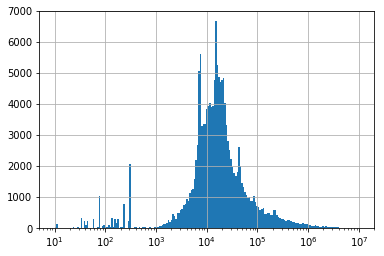

In [140]:
# plot of square feet
bins = 10**(np.linspace(1, 7, 200))
ax= parcels_df.SQUARE_FEET[parcels_df.SQUARE_FEET > 1].hist(bins=bins)
ax.set_xscale('log')

# Trees Dataset

In [141]:
# trees_df = pd.read_csv('../data/trees/trees.csv', index_col=0)
trees_df = pd.read_csv('https://gitlab.com/costrouc/knoxville-opendata-notebooks/raw/master/data/trees/trees.csv', index_col=0)

In [142]:
trees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15325 entries, 10413 to 14192
Data columns (total 18 columns):
ADDRESS       15325 non-null int64
AREA2         15323 non-null object
COMMONNAME    15325 non-null object
CULTIVAR      9566 non-null object
DBH           15325 non-null int64
FROMSTR       15325 non-null object
ID            15325 non-null int64
ONSTR         15325 non-null object
SIDE          15325 non-null object
SITE          15325 non-null int64
SPP           15325 non-null object
STEMS         15325 non-null int64
STREET        15325 non-null object
SUFFIX        9776 non-null object
TOSTR         15325 non-null object
X             15325 non-null float64
Y             15325 non-null float64
YRPLNT        15325 non-null int64
dtypes: float64(2), int64(6), object(10)
memory usage: 2.2+ MB


In [143]:
trees_df.head(5)

,ADDRESS,AREA2,COMMONNAME,CULTIVAR,DBH,FROMSTR,ID,ONSTR,SIDE,SITE,SPP,STEMS,STREET,SUFFIX,TOSTR,X,Y,YRPLNT
OBJECTID,,,,,,,,,,,,,,,,,,
10413,300,CBID,American Sycamore,None,12,CLINCH AVE,59,ELEVENTH ST,Front,6,Platanus occidentalis,1,ELEVENTH ST,X,WORLDS FAIR PARK DR,2582069.270,599623.4900,0
10412,300,CBID,American Sycamore,None,12,CLINCH AVE,58,ELEVENTH ST,Front,5,Platanus occidentalis,1,ELEVENTH ST,X,WORLDS FAIR PARK DR,2582078.710,599599.1400,0
4998,1050,Fort Kid Park,Flowering Dogwood,NaN,8,WORLDS FAIR PARK DR,12675,WORLDS FAIR PARK DR,Front,57,Cornus florida,1,WORLDS FAIR PARK DR,NaN,WORLDS FAIR PARK DR,2582094.779,599595.9949,0
7768,1050,Fort Kid Park,Golden Raintree,NaN,12,WORLDS FAIR PARK DR,12670,WORLDS FAIR PARK DR,Front,52,Koelreuteria paniculata,1,WORLDS FAIR PARK DR,NaN,WORLDS FAIR PARK DR,2582192.490,599550.4082,0
1817,300,CBID,Silver Maple,None,28,CLINCH AVE,61,ELEVENTH ST,Front,8,Acer saccharinum,1,ELEVENTH ST,X,WORLDS FAIR PARK DR,2581958.010,599827.8700,0


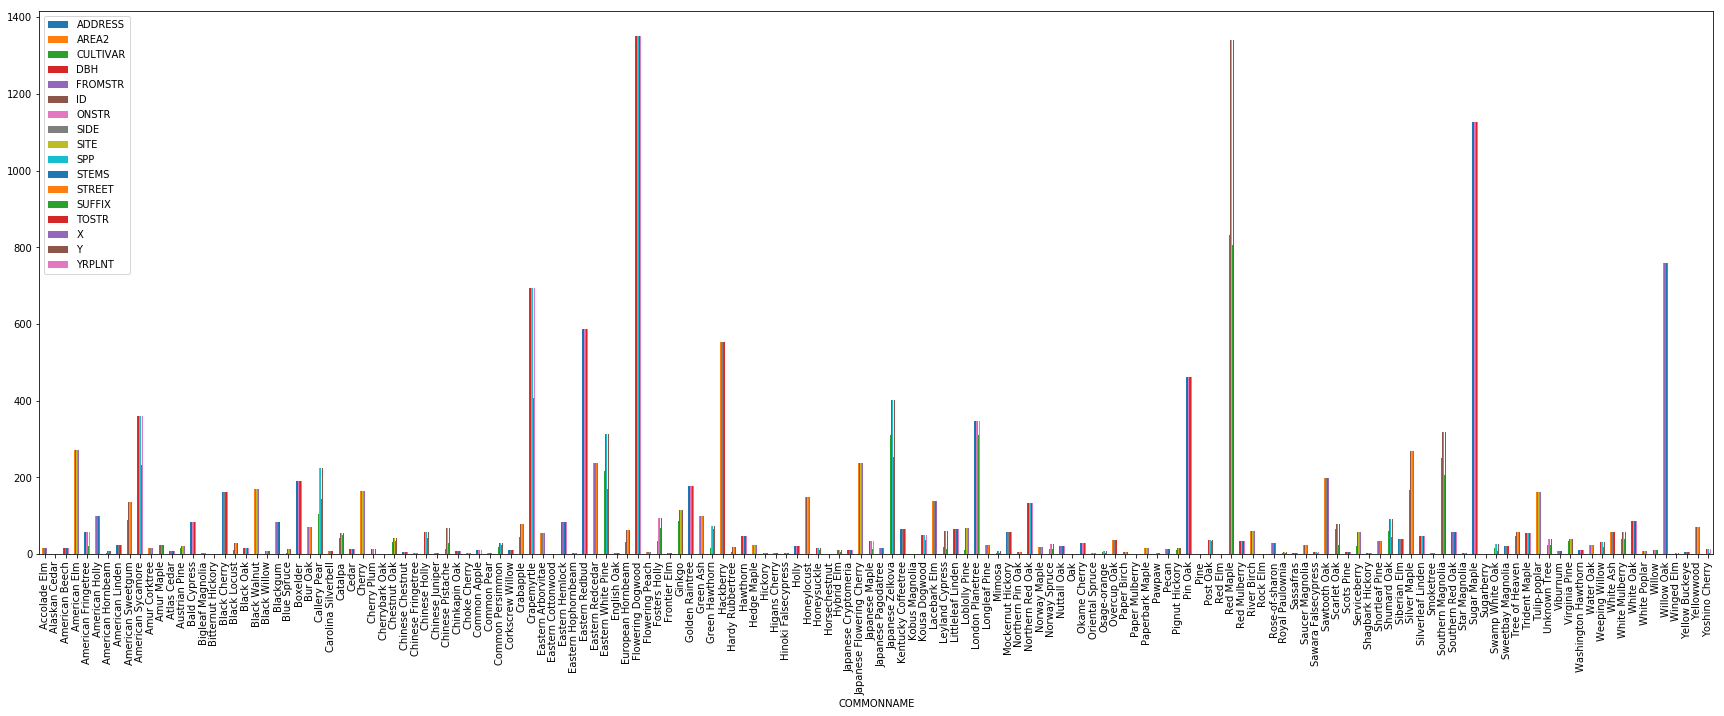

In [144]:
trees_df.groupby('COMMONNAME').count().plot(kind='bar', figsize=(30, 10))

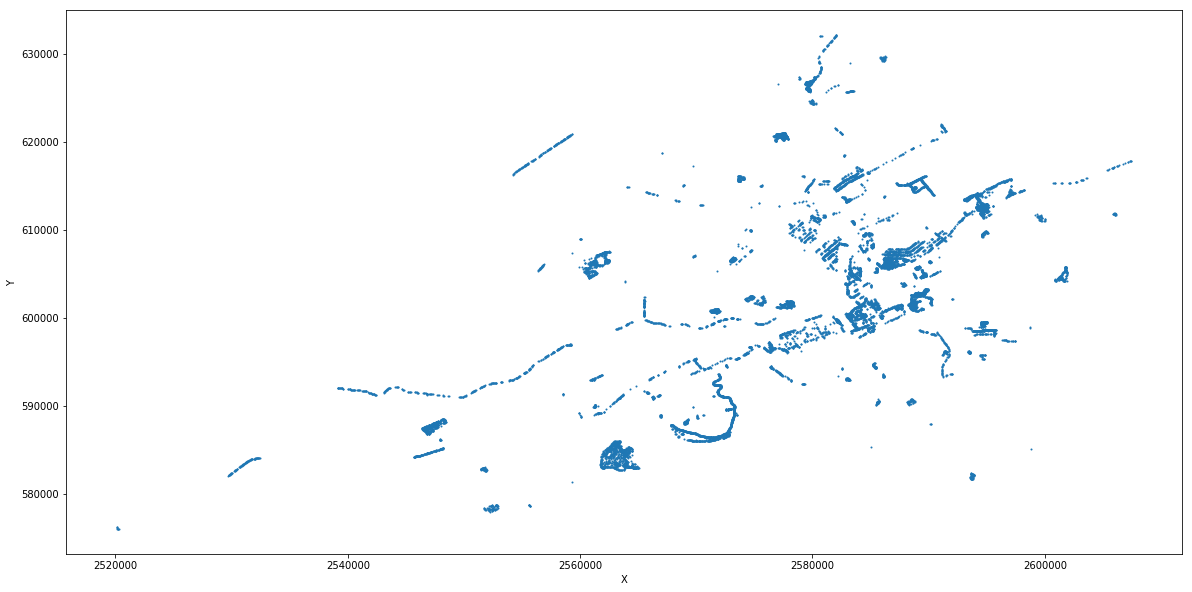

In [145]:
trees_df.plot.scatter(x='X', y='Y', s=1, figsize=(20, 10))

# Future Trees Dataset

In [147]:
# future_trees_df = pd.read_csv('../data/trees/future_trees.csv', index_col=0)
future_trees_df = pd.read_csv('https://gitlab.com/costrouc/knoxville-opendata-notebooks/raw/master/data/trees/future_trees.csv', index_col=0)

In [148]:
future_trees_df.head(5)

,ADDRESS,AREA2,COMMONNAME,CULTIVAR,DBH,FROMSTR,ID,ONSTR,SIDE,SITE,SPP,STEMS,STREET,SUFFIX,TOSTR,X,Y,YRPLNT
OBJECTID,,,,,,,,,,,,,,,,,,
16653,1101,Fort Sanders,vacant site small,None,0,ELEVENTH ST,10065,HIGHLAND AVE,Front,1,vacant site small,0,HIGHLAND AVE,NaN,TWELFTH ST,2582039.463,599645.4323,0
16627,1210,Fort Sanders,vacant site small,None,0,THIRTEENTH ST,10045,FOREST AVE,Front,1,vacant site small,0,FOREST AVE,NaN,TWELFTH ST,2581387.086,599700.7956,0
16655,1101,Fort Sanders,vacant site small,None,0,ELEVENTH ST,10068,HIGHLAND AVE,Front,4,vacant site small,0,HIGHLAND AVE,NaN,TWELFTH ST,2581936.680,599606.8446,0
16662,1101,Fort Sanders,vacant site small,None,0,ELEVENTH ST,10066,HIGHLAND AVE,Front,2,vacant site small,0,HIGHLAND AVE,NaN,TWELFTH ST,2581984.326,599628.3764,0
16623,1205,Fort Sanders,vacant site small,None,0,TWELFTH ST,10041,FOREST AVE,Front,1,vacant site small,0,FOREST AVE,NaN,THIRTEENTH ST,2581459.639,599825.4187,0


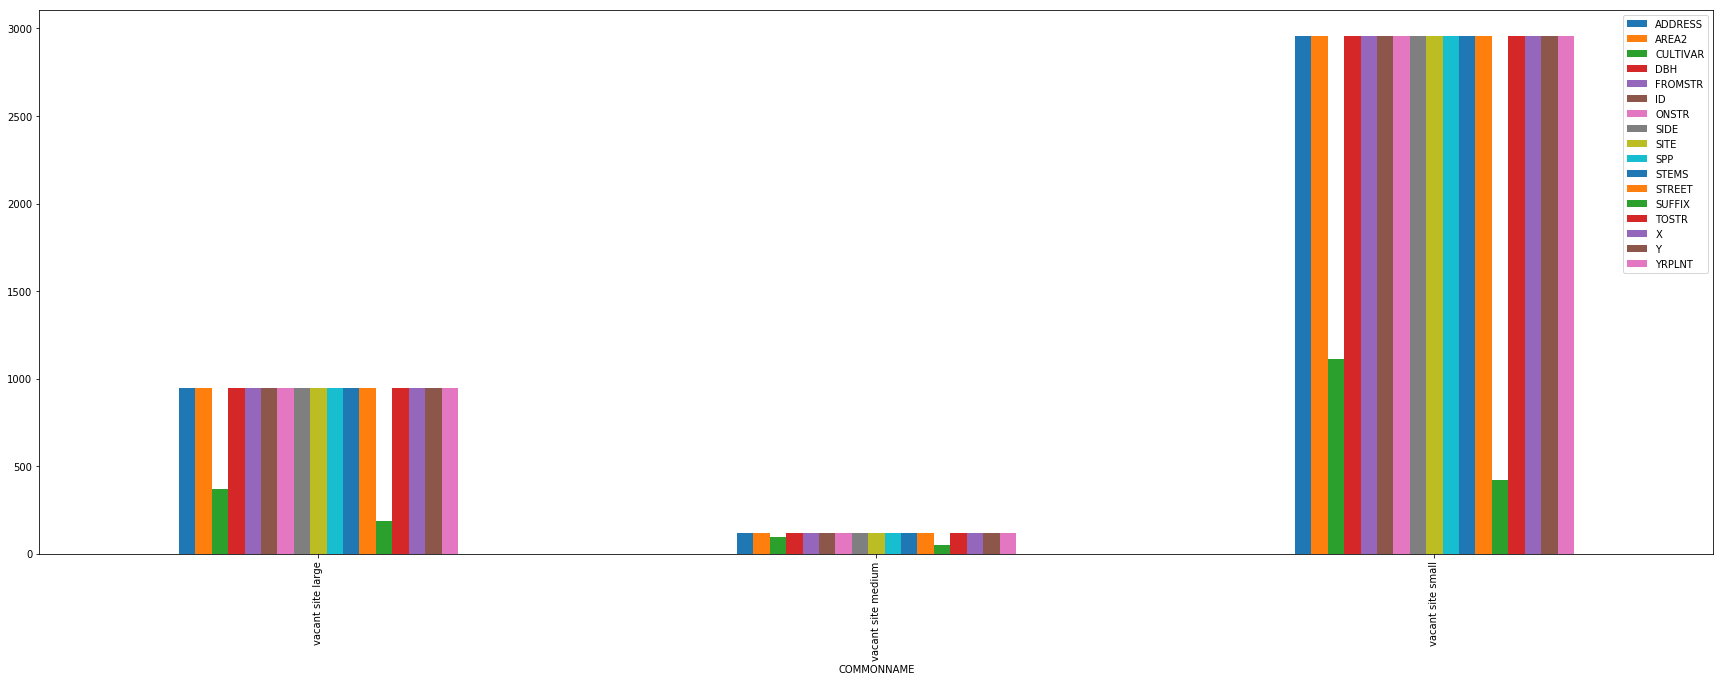

In [149]:
future_trees_df.groupby('COMMONNAME').count().plot(kind='bar', figsize=(30, 10))

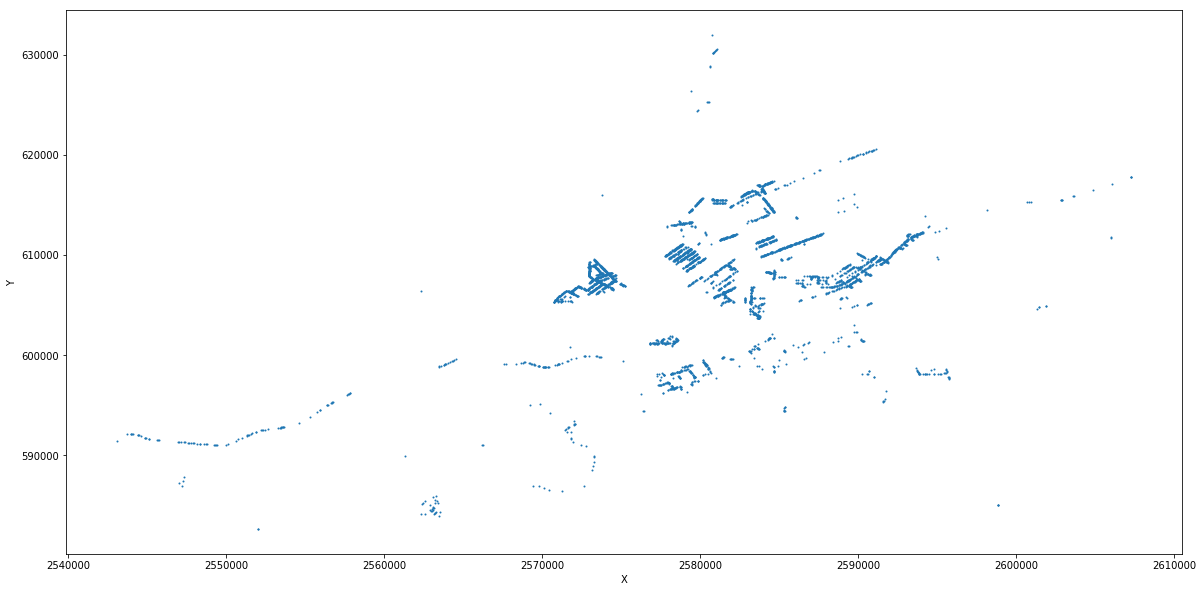

In [150]:
future_trees_df.plot.scatter(x='X', y='Y', s=1, figsize=(20, 10))